In [262]:
import seaborn as sns
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

print("THIS IS SNS.VERSION -> {}".format(sns.__version__))

THIS IS SNS.VERSION -> 0.9.0


In [263]:
from ohmysportsfeedspy import MySportsFeeds
from pprint import pprint
from pathlib import Path
import json

In [264]:
def get_output_from_api(username, password):
	# where api json file is stored
	path = 'results/roster_players-nfl-2017-2018-regular.json'

	# load json from results cache
	if Path(path).exists():
		with open(path, 'r') as f:
			output = json.load(f)
	# make request to API if no cache
	else:
		msf = MySportsFeeds(version="1.2", verbose=True)
		msf.authenticate(username, password)
		output = msf.msf_get_data(league='nfl', season='2017-2018-regular', feed='roster_players', format='json')

	return output

In [265]:
def get_player(entry):
	# store each player as an object
	player = {}

	# add respective fields for players
	try:
		player['name'] = entry['player']['FirstName'] + ' ' + entry['player']['LastName']
		player['position'] = entry['player']['Position']
		player['height'] = entry['player']['Height']
		player['weight'] = entry['player']['Weight']

	# in the case that information is missing, set field to 'N/A'
	except KeyError as error:
		attribute = str(error).strip('\'').lower()
		player[attribute] = 'N/A'

	return player

In [196]:
def get_team_players(output):
	# stores teams as keys and a list of player as values
	teams = {}

	# add every player from output
	for entry in output['rosterplayers']['playerentry']:
		# get player information in an object
		player = get_player(entry)

		# initializes list once from each team
		if entry['team']['Name'] not in teams:
			teams[entry['team']['Name']] = []

		# adds player to the appropriate team list
		teams[entry['team']['Name']].append(player)

	return teams

In [266]:
def save_to_file(teams):
	# opens file with write permissions
	f = open('results.txt', 'w')

	# converts dictionary to string and saves in file
	f.write(str(teams))

	# closes file stream
	f.close()

# commands
username = '8663abc5-a99a-4f33-90c4-c1d697'
password = 'Dk30RQHT'

output = get_output_from_api(username, password)

teams = get_team_players(output)

#pprint(teams)

save_to_file(teams)

print("There are {} teams".format(len(teams)))

There are 32 teams


# Ex 1:

In [267]:
def BMI_calc(height, mass):
    height = height*height
    BMI = (mass/height)*703
    return (BMI)

test_height = 70
test_weight = 150

print("My equation says: %.2f" % BMI_calc(test_height, test_weight))

My equation says: 21.52


# Ex 2:

In [268]:
def convertft_to_in(height):
    ft, inches = height.split("'")
    inches = inches[:-1]
    inches = int(ft)*12 + int(inches)
    return(inches)

test_heights = ['6\'11"','5\'4"','7\'9"','5\'10"','5\'4"']
results = []
for height in test_heights:
  results.append(convertft_to_in(height))

print(results)

[83, 64, 93, 70, 64]


In [274]:
position = []
BodyMassIndex = []
PlayerName = []
Height = []
Weight = []
Team = []
# Iterate through list of Teams
for tm in teams:
  # Iterate through each teams players
  for player in range(0, len(teams[tm])):
    # "player" will be a dictionary with name, position, height, and weight
    
    # check if weight exists
    # there was nine datapoints where a player's weight was not added.
    # I will exclude them from the dataset.
    # This a perfect example of the real world.
    # Usually data we recieve is not perfect and will have missing values or outliers
    if 'weight' in teams[tm][player]:
      height = teams[tm][player]['height']
      weight = int(teams[tm][player]['weight'])
      
      #We will use your methods for both of these, so make sure they are correct!
      inches = convertft_to_in(height)
      BMI = BMI_calc(inches, weight)
      
      #Lets create lists for easier conversion to Pandas
      Team.append(tm)
      Height.append(inches)
      Weight.append(weight)
      PlayerName.append(teams[tm][player]['name'])
      BodyMassIndex.append(BMI)
      position.append(teams[tm][player]['position'])

      teams[tm][player]['BMI'] = BMI                                                          

print("number of datapoints: {}".format(len(position)))

#create a pandas.DataFrame
data = pd.DataFrame(
    {'Team': Team,
     'PlayerName': PlayerName,
     'Position': position,
     'Height': Height,
     'Weight': Weight,
     'BMI': BodyMassIndex
    })

#sort the dataframe to this order
data = data[['Team', 'PlayerName', 'Position', 'Weight', 'Height', 'BMI']]

number of datapoints: 2020


In [156]:
data.head(100)

Empty DataFrame
Columns: [Team, PlayerName, Position, Weight, Height, BMI]
Index: []

In [158]:
data.sample(10)

Team        PlayerName Position  Weight  Height        BMI
2019  Cardinals     Scooby Wright      ILB     240      72  32.546296
1293   Patriots       Brian Hoyer       QB     215      74  27.601351
1603     Saints    Cameron Jordan       DE     287      76  34.930921
637        Jets      Bruce Carter      MLB     240      74  30.810811
1947    Bengals    Dustin Stanton        G     298      78  34.433596
900       Bills    Robert Blanton       DB     200      73  26.383937
1544   Steelers    James Harrison       LB     242      72  32.817515
1554   Steelers  Daniel McCullers       NT     352      79  39.650056
1984  Cardinals     Chris Johnson       RB     203      71  28.309661
773      Eagles      Ronald Darby       CB     193      71  26.915096

In [159]:
data['Position'].unique()

array(['DB', 'LB', 'LS', 'DE', 'DT', 'QB', 'OT', 'SS', 'WR', 'RB', 'FB',
       'CB', 'C', 'P', 'G', 'OLB', 'ILB', 'TE', 'K', 'T', 'FS', 'MLB',
       'NT'], dtype=object)

In [160]:
data['Position'].value_counts()

WR     232
LB     207
DE     169
CB     158
RB     151
DB     144
DT     131
TE     116
OT     107
G      102
QB      83
C       62
OLB     51
FS      45
SS      44
K       43
T       38
LS      36
P       35
ILB     30
NT      18
FB      11
MLB      7
Name: Position, dtype: int64

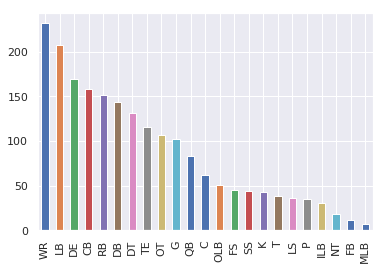

In [161]:
data['Position'].value_counts().plot('bar')

In [162]:
data.mean()

Team          (2.2981322711e-313+2.29813227125e-313j)
PlayerName                                         0j
Position                                           0j
Weight                        (244.31831683168318+0j)
Height                         (73.97376237623763+0j)
BMI                           (31.208071573728816+0j)
dtype: complex128

In [163]:
data.describe()

Weight       Height          BMI
count  2020.000000  2020.000000  2020.000000
mean    244.318317    73.973762    31.208072
std      45.841233     2.646183     4.526089
min      40.000000    66.000000     5.276787
25%     205.000000    72.000000    27.546122
50%     235.000000    74.000000    30.244622
75%     282.000000    76.000000    34.541785
max     358.000000    81.000000    45.971644

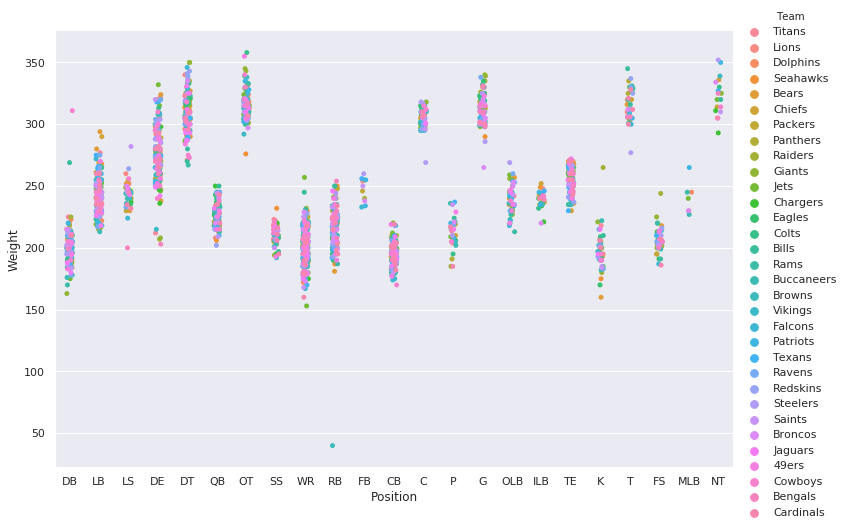

In [164]:
sns.catplot(x="Position", y="Weight", hue="Team", data=data, height=7, aspect=1.5);

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


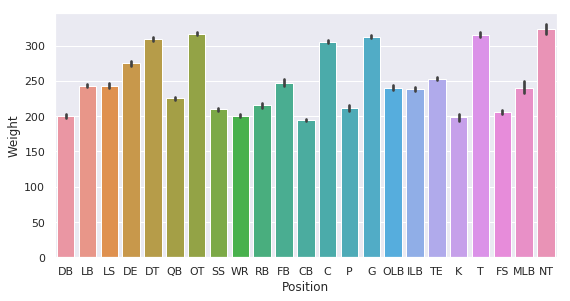

In [165]:
fig , ax = plt.subplots(figsize=(9,4.5))

sns.barplot(x='Position', y='Weight', data=data, ax = ax)

# Ex 3:

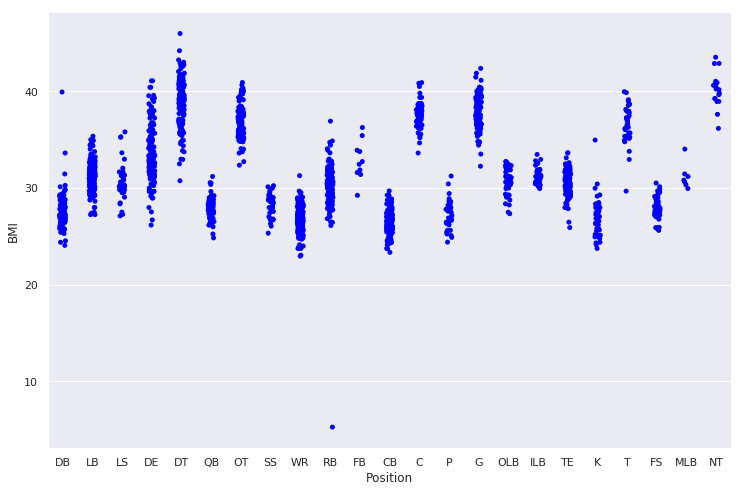

In [166]:
sns.catplot(x="Position", y="BMI", data=data, height=7, aspect=1.5, color="Blue")

In [275]:
print(data.loc[data['BMI'] < 10])
print("\nFound an outlier!!! BMI of 5.2 (O.o)", "Oh that makes sense, he only weighs 40lbs... WAIT WHAT???")
print("We will deal with Dan Vitale later")

        Team  PlayerName Position  Weight  Height       BMI
1136  Browns  Dan Vitale       RB      40      73  5.276787

Found an outlier!!! BMI of 5.2 (O.o) Oh that makes sense, he only weighs 40lbs... WAIT WHAT???
We will deal with Dan Vitale later


In [168]:
data[['Team', 'PlayerName', 'Position']]

Team         PlayerName Position
0        Titans         Manny Abad       DB
1        Titans        Daren Bates       LB
2        Titans       Antwon Blake       DB
3        Titans      Beau Brinkley       LS
4        Titans        Jayon Brown       LB
5        Titans        Kevin Byard       DE
6        Titans      Jurrell Casey       DT
7        Titans        Matt Cassel       QB
8        Titans       Jack Conklin       OT
9        Titans  Johnathan Cyprien       SS
10       Titans        Corey Davis       WR
11       Titans        Eric Decker       WR
12       Titans         Kevin Dodd       LB
13       Titans      Harry Douglas       WR
14       Titans     David Fluellen       RB
15       Titans     Jalston Fowler       FB
16       Titans      Derrick Henry       RB
17       Titans    Adoree' Jackson       CB
18       Titans     Rashad Johnson       DB
19       Titans          Ben Jones        C
20       Titans       DaQuan Jones       DE
21       Titans       Dennis Kelly       OT
22       Titans         Brett Kern        P
23       Titans         David King       DE
24       Titans         Josh Kline        G
25       Titans          Karl Klug       DE
26       Titans       Taylor Lewan       OT
27       Titans     Marcus Mariota       QB
28       Titans   Rishard Matthews       WR
29       Titans       Brice McCain       DB
...         ...                ...      ...
1990  Cardinals     Tyrann Mathieu       FS
1991  Cardinals        Evan Mathis        G
1992  Cardinals         Josh Mauro       DE
1993  Cardinals      Harlan Miller       CB
1994  Cardinals      Ifeanyi Momah       TE
1995  Cardinals        J.J. Nelson       WR
1996  Cardinals        Troy Niklas       TE
1997  Cardinals   Robert Nkemdiche       DT
1998  Cardinals      Carson Palmer       QB
1999  Cardinals      Elijhaa Penny       RB
2000  Cardinals       Corey Peters       DT
2001  Cardinals   Patrick Peterson       CB
2002  Cardinals    Adrian Peterson       RB
2003  Cardinals       Olsen Pierre       DE
2004  Cardinals     Haason Reddick       LB
2005  Cardinals  Shaquille Riddick       LB
2006  Cardinals        Jumal Rolle       CB
2007  Cardinals     Frostee Rucker       DE
2008  Cardinals  Ricky Seals-Jones       TE
2009  Cardinals       A.Q. Shipley        C
2010  Cardinals       Drew Stanton       QB
2011  Cardinals     Jared Veldheer        T
2012  Cardinals       Earl Watford        G
2013  Cardinals        John Wetzel        T
2014  Cardinals   Kerwynn Williams       RB
2015  Cardinals    Xavier Williams       DT
2016  Cardinals    Tramon Williams       CB
2017  Cardinals   Brandon Williams       CB
2018  Cardinals      Chad Williams       WR
2019  Cardinals      Scooby Wright      ILB

[2020 rows x 3 columns]

In [169]:
cardinals_data = data.loc[data['Team'] == 'Cardinals']
cardinals_data

Team         PlayerName Position  Weight  Height        BMI
1953  Cardinals        Budda Baker       SS     195      70  27.976531
1954  Cardinals     Antoine Bethea       SS     206      71  28.728030
1955  Cardinals      Justin Bethel       CB     200      72  27.121914
1956  Cardinals         Evan Boehm        C     310      75  38.743111
1957  Cardinals         Alex Boone        T     300      80  32.953125
1958  Cardinals       Tyvon Branch       DB     210      72  28.478009
1959  Cardinals       Aaron Brewer       LS     232      77  27.508180
1960  Cardinals        Jaron Brown       WR     205      74  26.317568
1961  Cardinals         John Brown       WR     179      71  24.962706
1962  Cardinals         Red Bryant       DT     323      76  39.312500
1963  Cardinals     Deone Bucannon       SS     211      73  27.835053
1964  Cardinals        Drew Butler        P     217      73  28.626572
1965  Cardinals         Josh Bynes       LB     240      73  31.660724
1966  Cardinals      Karlos Dansby       LB     251      75  31.369422
1967  Cardinals        Phil Dawson        K     200      71  27.891291
1968  Cardinals    Justin Drescher       LS     235      73  31.001126
1969  Cardinals    Durell Eskridge       FS     207      75  25.870400
1970  Cardinals   Larry Fitzgerald       WR     218      75  27.245156
1971  Cardinals        Jacoby Ford       WR     190      69  28.055030
1972  Cardinals          Rudy Ford       CB     204      72  27.664352
1973  Cardinals        D.J. Foster       RB     195      72  26.443866
1974  Cardinals     Blaine Gabbert       QB     235      76  28.601974
1975  Cardinals     Brittan Golden       WR     186      71  25.938901
1976  Cardinals   Jermaine Gresham       TE     260      77  30.828133
1977  Cardinals      Rodney Gunter       NT     305      77  36.163771
1978  Cardinals       Bronson Hill       RB     215      70  30.845918
1979  Cardinals        Will Holden        T     312      79  35.144368
1980  Cardinals        Gabe Holmes       TE     255      77  30.235284
1981  Cardinals     D.J. Humphries       OT     307      77  36.400911
1982  Cardinals        Mike Iupati        G     331      77  39.246585
...         ...                ...      ...     ...     ...        ...
1990  Cardinals     Tyrann Mathieu       FS     186      69  27.464398
1991  Cardinals        Evan Mathis        G     301      77  35.689492
1992  Cardinals         Josh Mauro       DE     282      78  32.584813
1993  Cardinals      Harlan Miller       CB     182      72  24.680941
1994  Cardinals      Ifeanyi Momah       TE     255      79  28.723762
1995  Cardinals        J.J. Nelson       WR     160      70  22.955102
1996  Cardinals        Troy Niklas       TE     270      78  31.198225
1997  Cardinals   Robert Nkemdiche       DT     296      76  36.026316
1998  Cardinals      Carson Palmer       QB     235      77  27.863889
1999  Cardinals      Elijhaa Penny       RB     234      74  30.040541
2000  Cardinals       Corey Peters       DT     305      75  38.118222
2001  Cardinals   Patrick Peterson       CB     219      73  28.890411
2002  Cardinals    Adrian Peterson       RB     220      73  29.022331
2003  Cardinals       Olsen Pierre       DE     293      76  35.661184
2004  Cardinals     Haason Reddick       LB     235      73  31.001126
2005  Cardinals  Shaquille Riddick       LB     260      78  30.042735
2006  Cardinals        Jumal Rolle       CB     188      72  25.494599
2007  Cardinals     Frostee Rucker       DE     280      75  34.993778
2008  Cardinals  Ricky Seals-Jones       TE     243      77  28.812447
2009  Cardinals       A.Q. Shipley        C     307      73  40.499343
2010  Cardinals       Drew Stanton       QB     243      75  30.369600
2011  Cardinals     Jared Veldheer        T     321      80  35.259844
2012  Cardinals       Earl Watford        G     300      75  37.493333
2013  Cardinals        John Wetzel        T     328      79  36.946643
2014  Cardinals   Kerwynn Williams 

In [276]:
quarterback_data = data.loc[data['Position'] == 'QB']
quarterback_data

Team            PlayerName Position  Weight  Height        BMI
7        Titans           Matt Cassel       QB     228      76  27.750000
27       Titans        Marcus Mariota       QB     220      76  26.776316
99        Lions           Jake Rudock       QB     208      75  25.995378
102       Lions      Matthew Stafford       QB     234      75  29.244800
127    Dolphins            Jay Cutler       QB     220      75  27.495111
132    Dolphins           David Fales       QB     213      74  27.344595
158    Dolphins         Matthew Moore       QB     220      75  27.495111
198    Seahawks          Austin Davis       QB     221      74  28.371622
245    Seahawks        Russell Wilson       QB     206      71  28.728030
269       Bears          Mike Glennon       QB     229      78  26.460717
306       Bears     Mitchell Trubisky       QB     222      75  27.745067
317      Chiefs            Tyler Bray       QB     215      78  24.843031
344      Chiefs       Patrick Mahomes       QB     230      75  28.744889
362      Chiefs            Alex Smith       QB     217      76  26.411184
387     Packers          Joe Callahan       QB     216      73  28.494652
403     Packers         Brett Hundley       QB     226      75  28.244978
427     Packers         Aaron Rodgers       QB     225      74  28.885135
439    Panthers        Derek Anderson       QB     230      78  26.576266
465    Panthers            Brad Kaaya       QB     215      76  26.167763
477    Panthers            Cam Newton       QB     245      77  29.049587
502     Raiders            Derek Carr       QB     215      75  26.870222
531     Raiders           E.J. Manuel       QB     237      76  28.845395
596      Giants           Eli Manning       QB     218      76  26.532895
615      Giants            Geno Smith       QB     221      75  27.620089
623      Giants            Davis Webb       QB     229      77  27.152471
650        Jets  Christian Hackenberg       QB     228      76  27.750000
664        Jets           Josh McCown       QB     218      76  26.532895
675        Jets           Bryce Petty       QB     230      75  28.744889
705    Chargers        Kellen Clemens       QB     220      74  28.243243
724    Chargers         Cardale Jones       QB     250      77  29.642435
...         ...                   ...      ...     ...     ...        ...
1237    Falcons             Matt Ryan       QB     217      76  26.411184
1241    Falcons           Matt Schaub       QB     245      78  28.309500
1260   Patriots             Tom Brady       QB     225      76  27.384868
1293   Patriots           Brian Hoyer       QB     215      74  27.601351
1349     Texans       Taylor Heinicke       QB     210      73  27.703134
1374     Texans            Tom Savage       QB     228      76  27.750000
1381     Texans        Deshaun Watson       QB     215      75  26.870222
1386     Texans            T.J. Yates       QB     217      76  26.411184
1401     Ravens            Joe Flacco       QB     245      78  28.309500
1417     Ravens          Ryan Mallett       QB     245      78  28.309500
1462   Redskins          Kirk Cousins       QB     202      75  25.245511
1490   Redskins            Colt McCoy       QB     215      73  28.362732
1552   Steelers          Landry Jones       QB     221      75  27.620089
1561   Steelers    Ben Roethlisberger       QB     241      77  28.575308
1582     Saints            Drew Brees       QB     209      72  28.342400
1587     Saints          Chase Daniel       QB     225      72  30.512153
1670    Broncos          Paxton Lynch       QB     244      79  27.484698
1679    Broncos        Brock Osweiler       QB     240      80  26.362500
1689    Broncos        Trevor Siemian       QB     220      75  27.495111
1708    Jaguars         Blake Bortles       QB     232      77  27.508180
1724    Jaguars            Chad Henne       QB     230      75  28.744889
1772      49ers         C.J. Beathard       QB     215      74  27.601351
1792      49ers

In [171]:
data.iloc[3]

Team                 Titans
PlayerName    Beau Brinkley
Position                 LS
Weight                  248
Height                   76
BMI                 30.1842
Name: 3, dtype: object

In [172]:
data.at[10, 'Height']

75

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


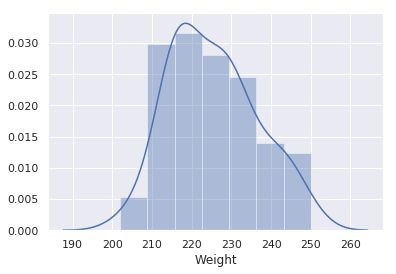

In [173]:
sns.distplot(quarterback_data['Weight'])

# Ex 4:

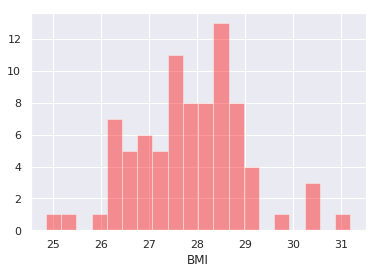

In [174]:
sns.distplot(quarterback_data['BMI'], color="RED", kde=False, bins=20)

# Ex 5:

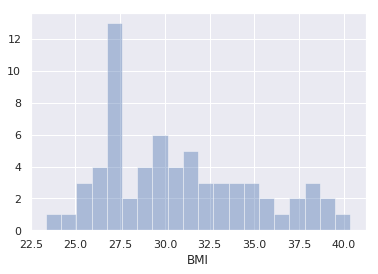

In [277]:
fortyniners_bmi_data = data.loc[data['Team'] == '49ers', "BMI"]
sns.distplot(fortyniners_bmi_data, kde=False, bins=20)

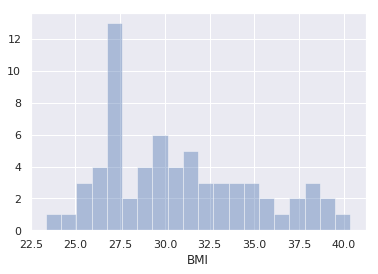

In [177]:
sns.distplot(fortyniners_bmi_data, hist=True, kde=False, bins=20)

# Ex 6:

In [278]:
weight = 225
data.loc[data['PlayerName'] == 'Dan Vitale', "Weight"] = weight


In [179]:
data.loc[data['PlayerName'] == 'Dan Vitale']

Team  PlayerName Position  Weight  Height       BMI
1136  Browns  Dan Vitale       RB     225      73  5.276787

In [180]:
BMI = (225/5329)*703
data.loc[data['PlayerName'] == 'Dan Vitale', "BMI"] = BMI

In [181]:
data.loc[data['PlayerName'] == 'Dan Vitale']

Team  PlayerName Position  Weight  Height        BMI
1136  Browns  Dan Vitale       RB     225      73  29.681929

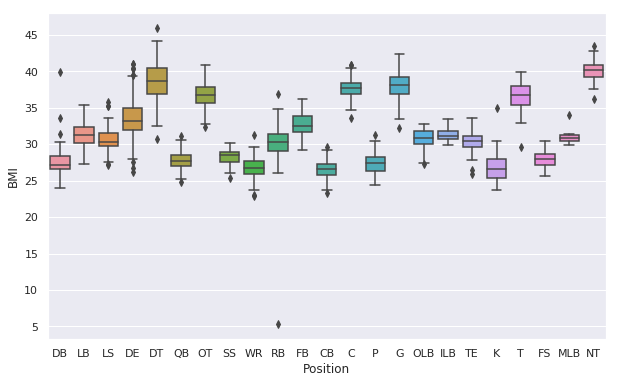

In [201]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(ax = ax, x="Position", y="BMI",
                data=data)

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


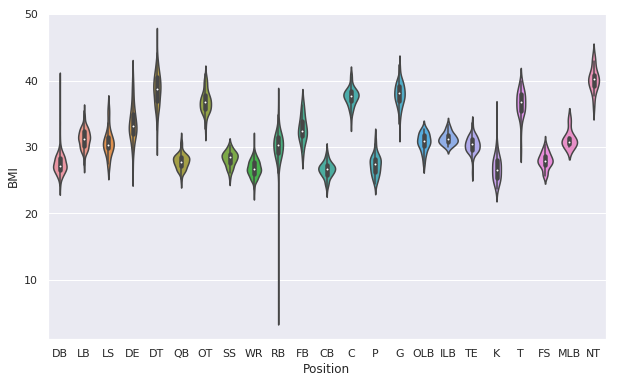

In [225]:
fig, ax = plt.subplots(figsize=(10,6))
sns.violinplot(ax = ax, x="Position", y="BMI",
                data=data)

# Ex 9:

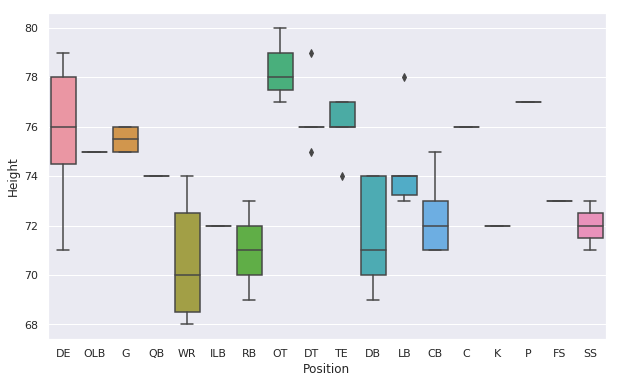

In [279]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(ax = ax, x="Position", y="Height", data=data.loc[data['Team'] == '49ers'])

# Ex 10:

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



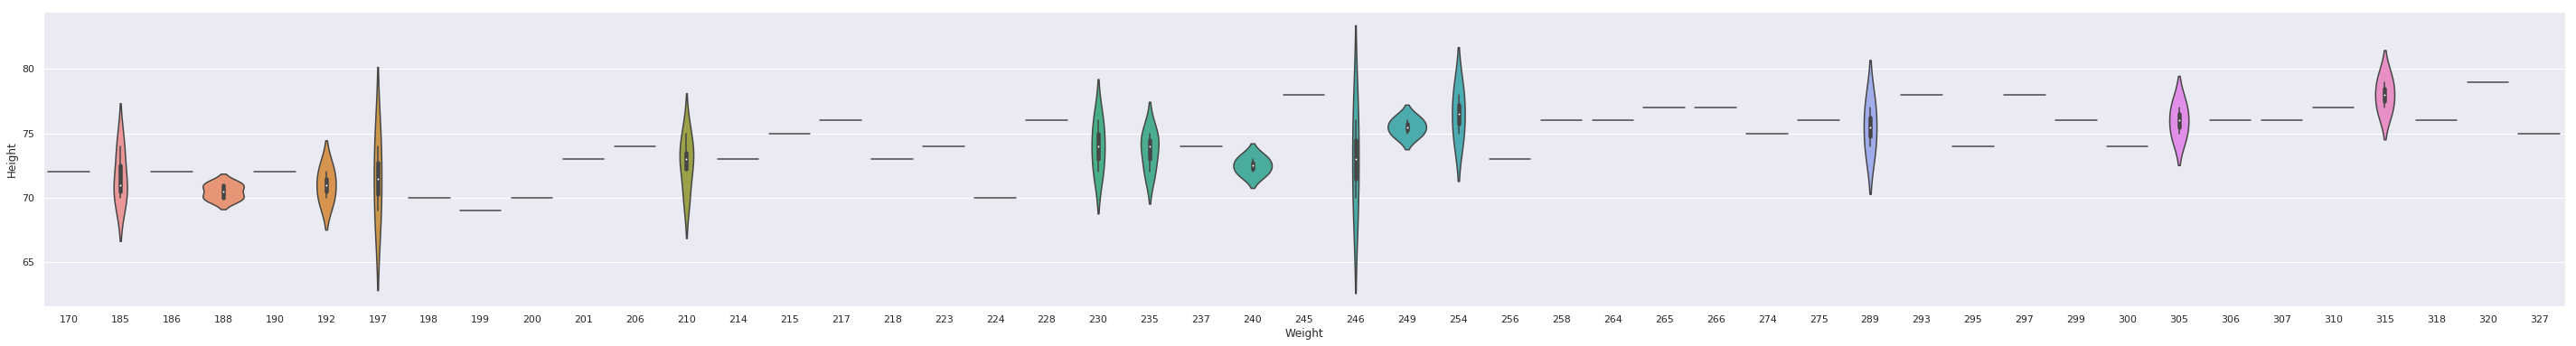

In [281]:
fig, ax = plt.subplots(figsize=(50,6))
sns.violinplot(ax = ax, x="Weight", y="Height", data=data.loc[data['Team'] == 'Texans'])

# Bonus:

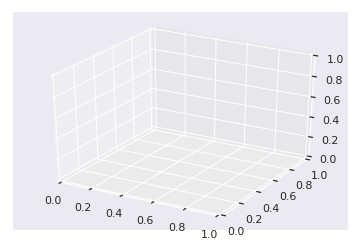

In [307]:
fig = plt.figure()
ax = plt.axes(projection='3d')

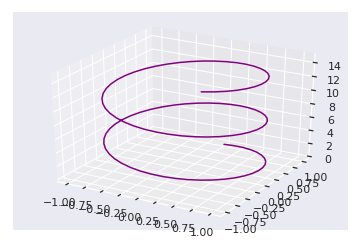

In [326]:
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 100)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'purple')

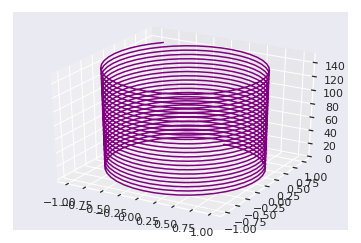

In [327]:
ax = plt.axes(projection='3d')

zline = np.linspace(0, 150, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'purple')